In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score,classification_report,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

import math
import torch
from torch import nn
from torch import optim
from torchvision.datasets import MNIST
from torch.utils.data import TensorDataset, DataLoader

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.utils.data as utils
from torch.optim import Adam 

In [32]:
trainloader = torch.utils.data.DataLoader(
        datasets.MNIST('MNIST_data/', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('MNIST_data/', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=16, shuffle=True)

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
device = torch.device('cpu')

cuda


In [34]:
def call_pr_loss(a , variance):
    k = len(a[0])
    l = torch.sum(a**2)/ variance**2 /2/k
    return k/2*math.log(2*math.pi) + 0.5*k*math.log(variance) + l

In [35]:
m_200 = 1
m_784 = 1

In [36]:
def eva(test_loader , model):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(data.size(0), -1)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return (test_loss ,correct / len(test_loader.dataset) )

In [38]:
model = nn.Sequential()
model.add_module('dp1' ,nn.Dropout())
model.add_module('l1', nn.Linear(784, 200))
model.add_module('r1', nn.Sigmoid())

model.add_module('dp2' , nn.Dropout())
model.add_module('l2', nn.Linear(200, 200))
model.add_module('r2', nn.Sigmoid())

model.add_module('dp3' , nn.Dropout())
model.add_module('l3', nn.Linear(200, 200))
model.add_module('r3', nn.Sigmoid())

model.add_module('dp4' , nn.Dropout())
model.add_module('l4', nn.Linear(200, 200))
model.add_module('r4', nn.Sigmoid())

model.add_module('dp5' , nn.Dropout())
model.add_module('l5', nn.Linear(200, 200))
model.add_module('r5', nn.Sigmoid())

model.add_module('dp6' , nn.Dropout())
model.add_module('l6', nn.Linear(200, 200))
model.add_module('r6', nn.Sigmoid())

model.add_module('dp7' , nn.Dropout())
model.add_module('l7', nn.Linear(200, 200))
model.add_module('r7', nn.Sigmoid())
model.add_module('l8', nn.Linear(200, 200))
model.add_module('r8', nn.Sigmoid())

model.add_module('dp8' , nn.Dropout())
model.add_module('lf', nn.Linear(200, 10))

model.to(device)

Sequential(
  (dp1): Dropout(p=0.5, inplace=False)
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (r1): Sigmoid()
  (dp2): Dropout(p=0.5, inplace=False)
  (l2): Linear(in_features=200, out_features=200, bias=True)
  (r2): Sigmoid()
  (dp3): Dropout(p=0.5, inplace=False)
  (l3): Linear(in_features=200, out_features=200, bias=True)
  (r3): Sigmoid()
  (dp4): Dropout(p=0.5, inplace=False)
  (l4): Linear(in_features=200, out_features=200, bias=True)
  (r4): Sigmoid()
  (dp5): Dropout(p=0.5, inplace=False)
  (l5): Linear(in_features=200, out_features=200, bias=True)
  (r5): Sigmoid()
  (dp6): Dropout(p=0.5, inplace=False)
  (l6): Linear(in_features=200, out_features=200, bias=True)
  (r6): Sigmoid()
  (dp7): Dropout(p=0.5, inplace=False)
  (l7): Linear(in_features=200, out_features=200, bias=True)
  (r7): Sigmoid()
  (l8): Linear(in_features=200, out_features=200, bias=True)
  (r8): Sigmoid()
  (dp8): Dropout(p=0.5, inplace=False)
  (lf): Linear(in_features=200, out_features

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

model.train()
step = 0 
loss_history = []
for epoch in range(1, 3):
    for batch_idx, (data, target) in enumerate(trainloader):
        
        data, target = data.to(device), target.to(device)
        data = data.view(data.size(0), -1)
        optimizer.zero_grad()
        output = model(data)
        loss_0 = criterion(output, target)
        
        loss_1 = call_pr_loss(model.l1.weight , m_784)
        
        loss_2 = call_pr_loss(model.l2.weight , m_200)
        loss_3 = call_pr_loss(model.l3.weight , m_200)
        loss_4 = call_pr_loss(model.l4.weight , m_200)
        loss_5 = call_pr_loss(model.l5.weight , m_200)
        loss_6 = call_pr_loss(model.l6.weight , m_200)
        loss_7 = call_pr_loss(model.l7.weight , m_200)
        loss_8 = call_pr_loss(model.l8.weight , m_200)
        
        loss_f = call_pr_loss(model.lf.weight , m_200)
        
        
        loss = loss_0   + loss_1+ loss_2+ loss_3 + loss_4  + loss_5 + loss_6 + loss_7 + loss_8 +loss_f
        loss.backward()
        optimizer.step()
        step += 1
        loss_history.append(loss.item())
        if step % 1000  == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} '.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))
    scheduler.step()
    eva( test_loader, model )

Train Epoch: 1 [15984/60000 (27%)]	Loss: 2193.091064 
Train Epoch: 1 [31984/60000 (53%)]	Loss: 2193.090332 
Train Epoch: 1 [47984/60000 (80%)]	Loss: 2193.074707 

Test set: Average loss: 0.1441, Accuracy: 982/10000 (10%)

Train Epoch: 2 [3984/60000 (7%)]	Loss: 2193.031982 
Train Epoch: 2 [19984/60000 (33%)]	Loss: 2193.102539 
Train Epoch: 2 [35984/60000 (60%)]	Loss: 2193.093506 
Train Epoch: 2 [51984/60000 (87%)]	Loss: 2193.050049 

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)



In [40]:
 c, d = eva(test_loader , model)


Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)



In [41]:
b =  np.logspace(-4 , 4 , 100)

In [42]:
model.l1.weight[10][10]

tensor(-3.3566e-39, grad_fn=<SelectBackward>)

In [43]:
loss_from_t = []
acc = []
s = 0
for i in b:
    model.l1.weight[10][10] = i
    test_loss, accur = eva(test_loader , model)
    loss_from_t.append(test_loss)
    acc.append(accur)
    print(s)
    s += 1
    


Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

0

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

1

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

2

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

3

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

4

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

5

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

6

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

7

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

8

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

9

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

10

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

11

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

12

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

13

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

14

Test set: Average loss: 0.1439, Accuracy: 1135/10

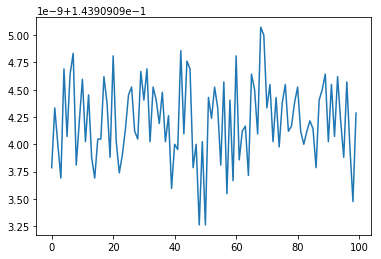

In [44]:
plt.plot(loss_from_t)

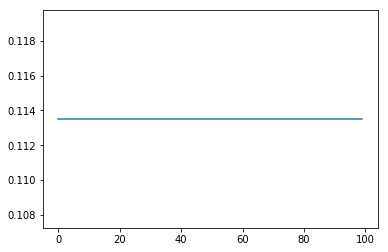

In [45]:
plt.plot(acc)

In [46]:
model = nn.Sequential()
model.add_module('dp1' ,nn.Dropout())
model.add_module('l1', nn.Linear(784, 200))
model.add_module('r1', nn.Sigmoid())

model.add_module('dp2' , nn.Dropout())
model.add_module('l2', nn.Linear(200, 200))
model.add_module('r2', nn.Sigmoid())

model.add_module('dp3' , nn.Dropout())
model.add_module('l3', nn.Linear(200, 200))
model.add_module('r3', nn.Sigmoid())

model.add_module('dp4' , nn.Dropout())
model.add_module('l4', nn.Linear(200, 200))
model.add_module('r4', nn.Sigmoid())

model.add_module('dp5' , nn.Dropout())
model.add_module('l5', nn.Linear(200, 200))
model.add_module('r5', nn.Sigmoid())

model.add_module('dp6' , nn.Dropout())
model.add_module('l6', nn.Linear(200, 200))
model.add_module('r6', nn.Sigmoid())

model.add_module('dp7' , nn.Dropout())
model.add_module('l7', nn.Linear(200, 200))
model.add_module('r7', nn.Sigmoid())
model.add_module('l8', nn.Linear(200, 200))
model.add_module('r8', nn.Sigmoid())

model.add_module('dp8' , nn.Dropout())
model.add_module('lf', nn.Linear(200, 10))

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

model.train()
step = 0 
loss_history = []
for epoch in range(1, 3):
    for batch_idx, (data, target) in enumerate(trainloader):
        
        data, target = data.to(device), target.to(device)
        data = data.view(data.size(0), -1)
        optimizer.zero_grad()
        output = model(data)
        loss_0 = criterion(output, target)
        
        loss_1 = call_pr_loss(model.l1.weight , m_784)
        
        loss_2 = call_pr_loss(model.l2.weight , m_200)
        loss_3 = call_pr_loss(model.l3.weight , m_200)
        loss_4 = call_pr_loss(model.l4.weight , m_200)
        loss_5 = call_pr_loss(model.l5.weight , m_200)
        loss_6 = call_pr_loss(model.l6.weight , m_200)
        loss_7 = call_pr_loss(model.l7.weight , m_200)
        loss_8 = call_pr_loss(model.l8.weight , m_200)
        
        loss_f = call_pr_loss(model.lf.weight , m_200)
        
        
        loss = loss_0   + loss_1+ loss_2+ loss_3 + loss_4  + loss_5 + loss_6 + loss_7 + loss_8 +loss_f
        loss.backward()
        optimizer.step()
        step += 1
        loss_history.append(loss.item())
        if step % 1000  == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} '.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))
    scheduler.step()
    eva( test_loader, model )

Train Epoch: 1 [15984/60000 (27%)]	Loss: 2193.037598 
Train Epoch: 1 [31984/60000 (53%)]	Loss: 2193.048340 
Train Epoch: 1 [47984/60000 (80%)]	Loss: 2193.074219 

Test set: Average loss: 0.1440, Accuracy: 1028/10000 (10%)

Train Epoch: 2 [3984/60000 (7%)]	Loss: 2193.076904 
Train Epoch: 2 [19984/60000 (33%)]	Loss: 2193.024902 
Train Epoch: 2 [35984/60000 (60%)]	Loss: 2193.047363 
Train Epoch: 2 [51984/60000 (87%)]	Loss: 2193.069336 

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)



In [47]:
loss_from_t = []
acc = []
s = 0
for i in b:
    model.l2.weight[10][10] = i
    test_loss, accur = eva(test_loader , model)
    loss_from_t.append(test_loss)
    acc.append(accur)
    print(s)
    s += 1


Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

0

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

1

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

2

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

3

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

4

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

5

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

6

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

7

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

8

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

9

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

10

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

11

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

12

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

13

Test set: Average loss: 0.1439, Accuracy: 1135/10000 (11%)

14

Test set: Average loss: 0.1439, Accuracy: 1135/10

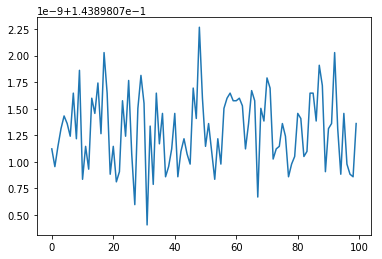

In [48]:
plt.plot(loss_from_t)

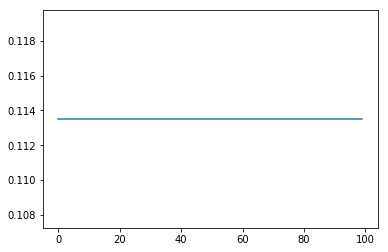

In [49]:
plt.plot(acc)

In [50]:
b  = np.logspace(-4 , 4 , 10)

In [51]:
test_loss_from_var = []
accur_from_var = []
train_loss_history = []
s = 0
for i in b:
    m_200 = i
    m_784 = i
    model = nn.Sequential()
    model.add_module('dp1' ,nn.Dropout())
    model.add_module('l1', nn.Linear(784, 200))
    model.add_module('r1', nn.Sigmoid())

    model.add_module('dp2' , nn.Dropout())
    model.add_module('l2', nn.Linear(200, 200))
    model.add_module('r2', nn.Sigmoid())

    model.add_module('dp3' , nn.Dropout())
    model.add_module('l3', nn.Linear(200, 200))
    model.add_module('r3', nn.Sigmoid())

    model.add_module('dp4' , nn.Dropout())
    model.add_module('l4', nn.Linear(200, 200))
    model.add_module('r4', nn.Sigmoid())

    model.add_module('dp5' , nn.Dropout())
    model.add_module('l5', nn.Linear(200, 200))
    model.add_module('r5', nn.Sigmoid())

    model.add_module('dp6' , nn.Dropout())
    model.add_module('l6', nn.Linear(200, 200))
    model.add_module('r6', nn.Sigmoid())

    model.add_module('dp7' , nn.Dropout())
    model.add_module('l7', nn.Linear(200, 200))
    model.add_module('r7', nn.Sigmoid())
    model.add_module('l8', nn.Linear(200, 200))
    model.add_module('r8', nn.Sigmoid())

    model.add_module('dp8' , nn.Dropout())
    model.add_module('lf', nn.Linear(200, 10))
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    #scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

    model.train()
    step = 0 
    loss_history = []
    for epoch in range(1, 3):
        for batch_idx, (data, target) in enumerate(trainloader):

            data, target = data.to(device), target.to(device)
            data = data.view(data.size(0), -1)
            optimizer.zero_grad()
            output = model(data)
            loss_0 = criterion(output, target)
        
            loss_1 = call_pr_loss(model.l1.weight , m_784)

            loss_2 = call_pr_loss(model.l2.weight , m_200)
            loss_3 = call_pr_loss(model.l3.weight , m_200)
            loss_4 = call_pr_loss(model.l4.weight , m_200)
            loss_5 = call_pr_loss(model.l5.weight , m_200)
            loss_6 = call_pr_loss(model.l6.weight , m_200)
            loss_7 = call_pr_loss(model.l7.weight , m_200)
            loss_8 = call_pr_loss(model.l8.weight , m_200)

            loss_f = call_pr_loss(model.lf.weight , m_200)


            loss = loss_0   + loss_1+ loss_2+ loss_3 + loss_4  + loss_5 + loss_6 + loss_7 + loss_8 +loss_f
            loss.backward()
            optimizer.step()
            step += 1
            loss_history.append(loss.item())
            #if step % 1000  == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} '.format(
            epoch, batch_idx * len(data), len(trainloader.dataset),
            100. * batch_idx / len(trainloader), loss.item()))
        #scheduler.step()  
        
        
    test_loss, accur = eva(test_loader , model)
    
    test_loss_from_var.append(test_loss)
    accur_from_var.append(accur)
    train_loss_history.append(loss_history)
    print(s)
    s += 1
    

Train Epoch: 1 [59984/60000 (100%)]	Loss: -8781.071289 
Train Epoch: 2 [59984/60000 (100%)]	Loss: -8768.748047 

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

0
Train Epoch: 1 [59984/60000 (100%)]	Loss: -6345.915039 
Train Epoch: 2 [59984/60000 (100%)]	Loss: -6345.682617 

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

1
Train Epoch: 1 [59984/60000 (100%)]	Loss: -3906.236084 
Train Epoch: 2 [59984/60000 (100%)]	Loss: -3906.197998 

Test set: Average loss: 0.1438, Accuracy: 1135/10000 (11%)

2
Train Epoch: 1 [59984/60000 (100%)]	Loss: -1466.551636 
Train Epoch: 2 [59984/60000 (100%)]	Loss: -1466.525391 

Test set: Average loss: 0.1441, Accuracy: 980/10000 (10%)

3
Train Epoch: 1 [59984/60000 (100%)]	Loss: 973.215942 
Train Epoch: 2 [59984/60000 (100%)]	Loss: 973.192383 

Test set: Average loss: 0.1447, Accuracy: 1009/10000 (10%)

4
Train Epoch: 1 [59984/60000 (100%)]	Loss: 3412.915039 
Train Epoch: 2 [59984/60000 (100%)]	Loss: 3412.941406 

Test set: Average l

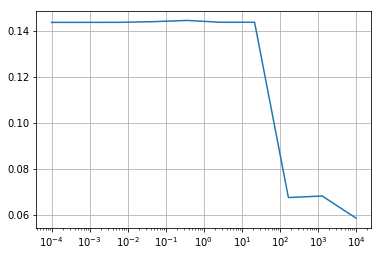

In [55]:
plt.semilogx(b , test_loss_from_var )
plt.grid()

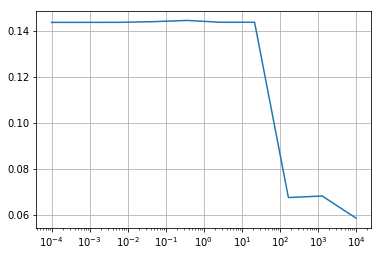

In [56]:
plt.semilogx( b , test_loss_from_var)
plt.grid()

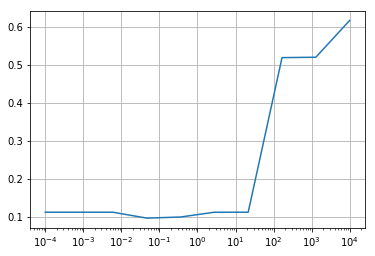

In [57]:
plt.semilogx( b , accur_from_var)
plt.grid()